In [1]:
import pandas as pd
import requests
import seaborn as sns
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [2]:
url = 'https://worldtable.info/gosudarstvo/tablica-rozhdaemosti-po-godam-rossija.html'   
    
HOST = 'https://worldtable.info/gosudarstvo/tablica-rozhdaemosti-po-godam-rossija.html'

HEADERS = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.1.2 Safari/605.1.15',
}

r = requests.get(url, headers=HEADERS)
soup = BeautifulSoup(r.text, 'html.parser')


table_birth = soup.find('div', class_='item-description').find_all('td')

In [3]:
lst_df_year = []
lst_df_birth = []

for i in range(len(table_birth)):
    if i % 2 == 0:
        lst_df_year.append(pd.DataFrame(table_birth[i]))
    else:
        lst_df_birth.append(pd.DataFrame(table_birth[i]))

        
df_year = pd.concat(lst_df_year).reset_index()
df_year = df_year.drop('index', axis=1)
df_birth = pd.concat(lst_df_birth).reset_index()
df_birth = df_birth.drop('index', axis=1)
df = pd.merge(df_year, df_birth, left_index=True, right_index=True)
df.columns = ['year', 'birth']
df = df.drop([0])
df

,year,birth
1,1959,2 796 228
2,1960,2 782 353
3,1961,2 662 135
4,1962,2 482 539
5,1963,2 331 505
...,...,...
58,2016,1 893 256
59,2017,1 689 884
60,2018,1 599 316
61,2019,1 484 517


<AxesSubplot:xlabel='year', ylabel='birth'>

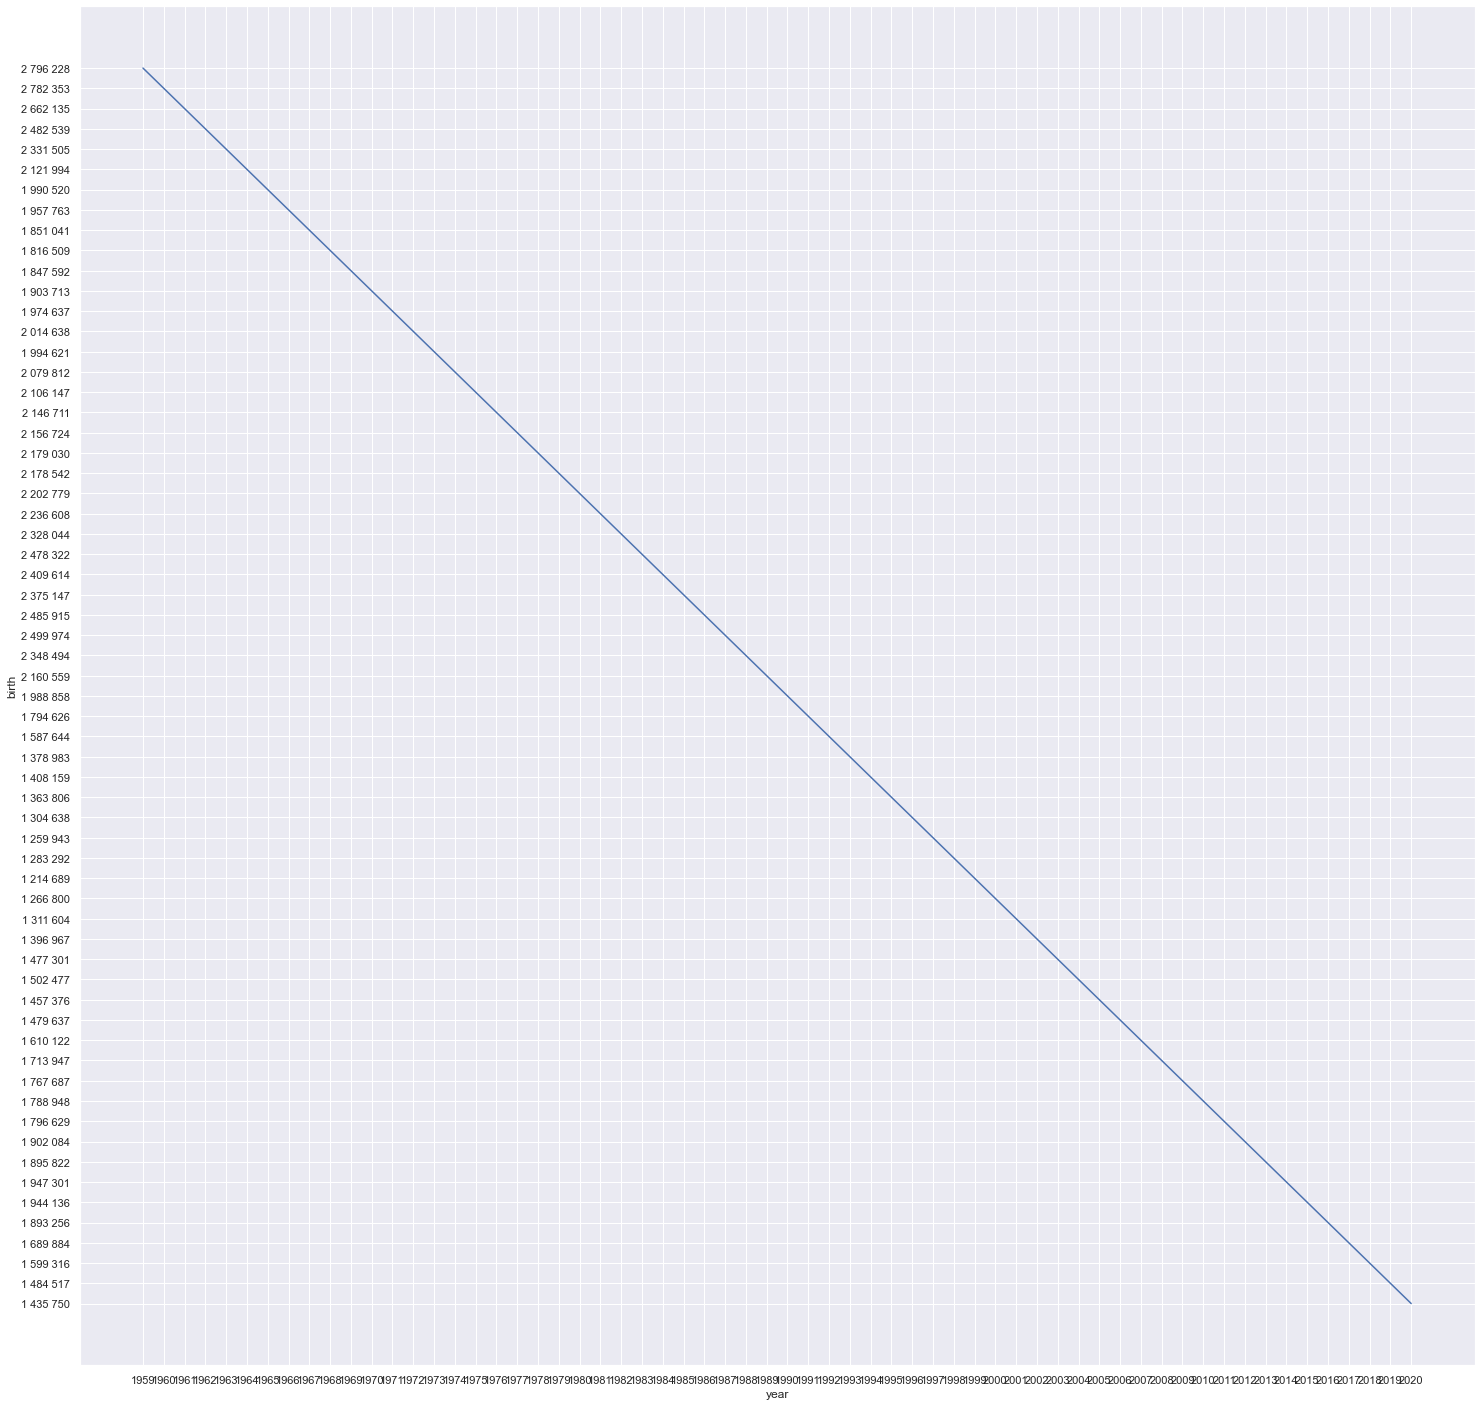

In [4]:
sns.set(rc={'figure.figsize':(25, 25)})
sns.lineplot(x="year", y="birth", data=df)